## Симаков Александр
## Лабораторная работа №8
## А-16-20
## N=28

In [235]:
import numpy as np
import matplotlib.pyplot as plt

##### Задача 8.1
Для уравнения второго порядка $$ -u''(x)+pu(x)'+qu(x)=f(x) $$ найти решение кравевой задачи:
$$ \begin{cases} -u''(x)+pu'(x)+qu(x)=f(x), x\in (a, b) \\ u(a) = u_a \\ u(b) = u_b\end{cases}, где$$
$$ a = 2 $$
$$ b = 4 $$
$$ p = -1 $$
$$ q = 0 $$
$$ f(x) = x^2 - 2x + 3 $$
$$ u_a = -1 $$
$$ u_b = -6 $$

Найдём аналитическое решение задачи:
$$ -u''(x)-u'(x)=x^2 - 2x + 3 $$
$$ -\lambda^2 -\lambda=0\Rightarrow \lambda_1 =0, \lambda_2 =-1$$
$$u_0(x)=c_1e^0+c_2e^{-x}=с_1+c_2e^{-x}$$
$$u_ч(x)=x(Ax^2+Bx+D)\Rightarrow u_ч'(x)=3Ax^2+2Bx+D\Rightarrow u_ч''(x)=6Ax+2B$$
$$u_ч(x) = x(\frac{-x^2}{3}+2x-7)$$
$$u(x)=с_1+c_2e^{-x}+x(\frac{-x^2}{3}+2x-7)$$
$$u(x)=с_1+c_2e^{-x}-\frac{x^3}{3}+2x^2-7x$$
$$u(2)=с_1+c_2e^{-2}-\frac{2^3}{3}+2*2^2-7*2=с_1+c_2e^{-2}-\frac{26}{3}=-1\Rightarrow с_1+c_2e^{-2} = \frac{23}{3}$$
$$u(4)=с_1+c_2e^{-4}-\frac{4^3}{3}+2*4^2-7*4=-6\Rightarrow с_1+c_2e^{-4} = \frac{34}{3}$$
$$c_1 = \frac{23-34e^{2}}{3-3e^{2}}$$
$$c_2 = \frac{11e^{4}}{3-3e^{2}}$$

In [236]:
#точность 
eps = 10**(-3)

#границы
a, b = 2, 4

#шаг
h = 0.5

#функция f
def f(x):
    return x**2 - 2*x + 3

#функция u, полученная аналитически
def u(x):
    c1 = (23-34*np.exp(2))/(3-3*np.exp(2))
    c2 = (11*np.exp(4))/(3-3*np.exp(2))
    return c1 + c2*np.exp(-x) - (1/3)*x**3 + 2*x**2 - 7*x

In [237]:
#заполнение и решение матрицы
def solveMtrEq(a, b):
    n = len(a)
    res = [0 for i in range(0, n)]
#Прямой ход
    v, u = [0 for i in range(0, n)], [0 for i in range(0, n)]
    
  #0-ая строка
    v[0], u[0] = (a[0][1])/(-a[0][0]), (-b[0])/(-a[0][0])
    
  #без 0-ой и (n-1)-ой строк
    for i in range(1, n-1):
        v[i] = (a[i][i+1])/(-a[i][i] - a[i][i-1]*v[i-1])
        u[i] = (a[i][i-1]*u[i-1] - b[i])/(-a[i][i] - a[i][i-1]*v[i-1] )
        
  #(n-1)-ая строка
    v[n-1] = 0
    u[n-1] = (a[n-1][n-2]*u[n-2] - b[n-1])/(-a[n-1][n-1] - a[n-1][n-2]*v[n-2])
    
#Обратный ход
    res[n-1] = u[n-1]
    for i in range(n-1, 0, -1):
        res[i-1] = v[i-1] * res[i] + u[i-1]
    return res

Дабы дальше заполнять матрицу и вектор из правой части, составим разностную схему:
$$ -u''(x)-u'(x)=x^2 - 2x + 3 $$
$$ u'' = \frac{u_{i-1}-2u_i+u_{i+1}}{h^2}, u' = \frac{u_{i+1}-u_{i-1}}{2h} \Rightarrow $$
$$ -\frac{u_{i-1}-2u_i+u_{i+1}}{h^2}-\frac{u_{i+1}-u_{i-1}}{2h} = x^2+2x+3 |*2h^2 $$
$$ -2u_{i-1}+4u_i-2u_{i+1} - hu_{i+1} + hu_{i-1} = 2h^2(x^2 + 2x+3) $$

$$ u_{i-1}(h-2) + 4u_i + u_{i+1}(-2-h) = 2h^2(x^2 + 2x+3) $$

In [238]:
#вектор из функций в правой части
def vectorF(h):
    x = np.linspace(a, b, int((b-a)/h) + 1)
    vect = np.zeros([len(x)])
    vect[0], vect[len(x)-1] = -1, -6
    for i in range (1, len(vect)-1):
        vect[i]= (2*h**2)*f(a+h*i)
    return vect

In [239]:
#решение
def solveU(h):
    arrCoeff = [h-2, 4, -2-h]
    x = np.linspace(a, b, int((b-a)/h) + 1)
    mtr = np.zeros([len(x), len(x)])
    mtr[0][0] = 1
    mtr[len(x) - 1][len(x) - 1] = 1
    j = 0
    for i in range (1, len(mtr)-1):    
        mtr[i][j] = arrCoeff[0]
        mtr[i][j+1] = arrCoeff[1]
        mtr[i][j+2] = arrCoeff[2]
        j += 1    
    return solveMtrEq(mtr, vectorF(h))

In [240]:
#выбор макс разности между функций с шагами h и h/2
def maxR(u2h, uh):
    r = np.abs(u2h[1] - uh[2])
    for i in range(2, len(u2h)):
        if (np.abs(u2h[i] - uh[2*i])) >= r:
            r = np.abs(u2h[i] - uh[2*i])
    return r

In [241]:
#решение с точностью eps
def solveUEps(h, eps):
    u2h, uh = solveU(h), solveU(h/2)
    epsH = maxR(u2h, uh)
    while np.abs((epsH)/3) >= eps:
        h /= 2
        u2h = solveU(h)
        uh = solveU(h/2)
        epsH = maxR(u2h, uh)
    h  /= 2
    return uh

Изобразим график точного решения, полученного аналитически

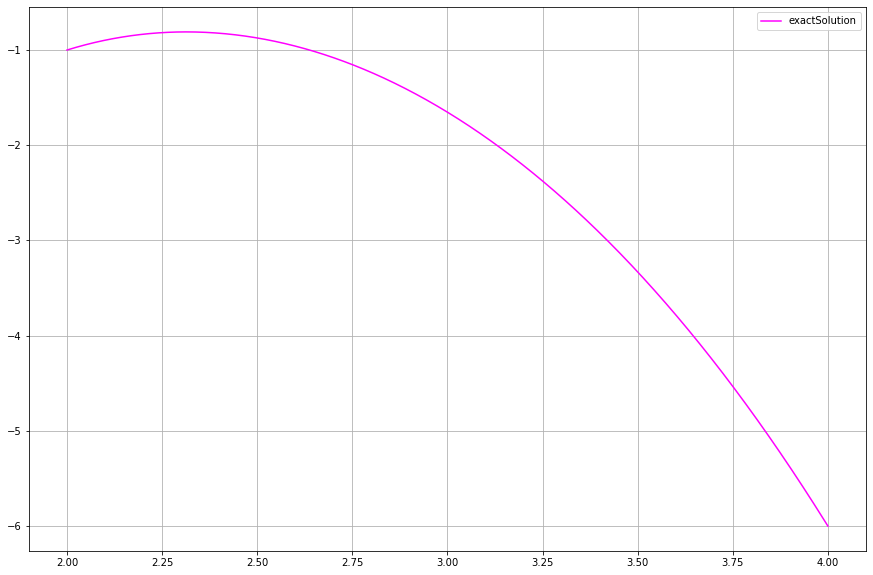

In [242]:
fix, axs = plt.subplots(1, 1, figsize = (15, 10))
x = np.linspace(a, b, 1000)
axs.plot (x, u(x), color = 'fuchsia', label = 'exactSolution')
axs.grid()
axs.legend()

Нарисуем график решения, полученного с помощью схемы

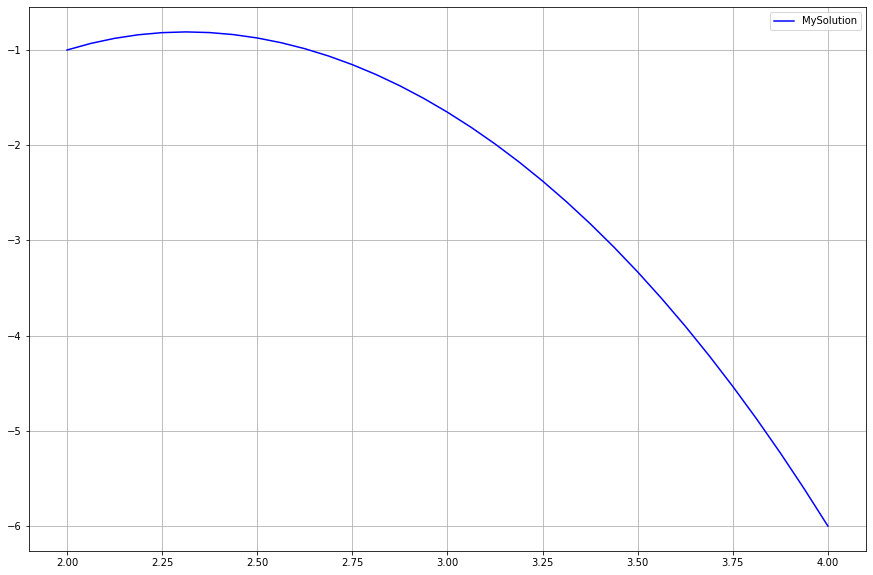

In [243]:
uMy = solveUEps(h, eps)
fix, axs = plt.subplots(1, 1, figsize = (15, 10))
x = np.linspace(a, b, len(uMy))
axs.plot (x, uMy, color = 'blue', label = 'MySolution')
axs.grid()
axs.legend()

Для наглядности изобразим оба графика в одной координатной плоскости

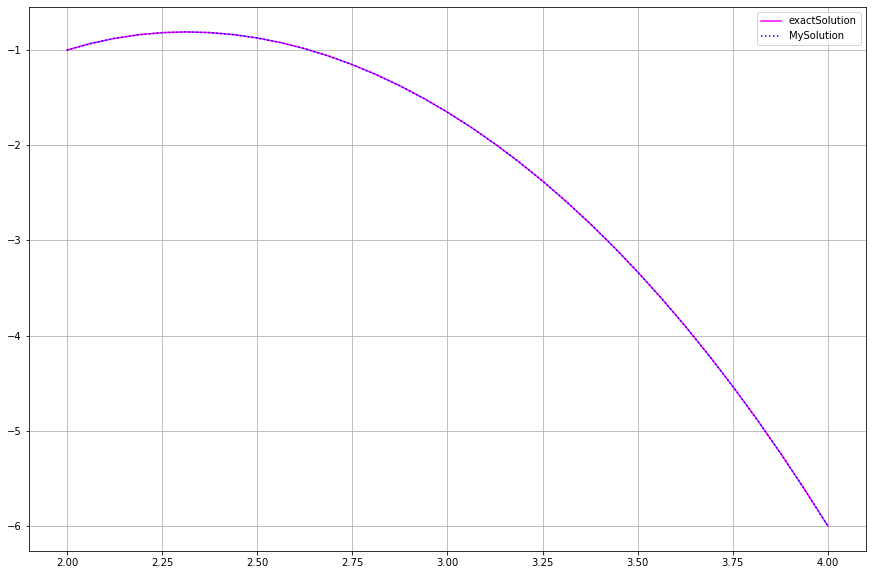

In [244]:
fix, axs = plt.subplots(1, 1, figsize = (15, 10))
x = np.linspace(a, b, len(uMy))
axs.plot (x, u(x), color = 'fuchsia', label = 'exactSolution')
axs.plot (x, uMy, color = 'blue', label = 'MySolution', linestyle = 'dotted')
axs.grid()
axs.legend()

Видно, что функции очень близки

Нарисуем график погрешности

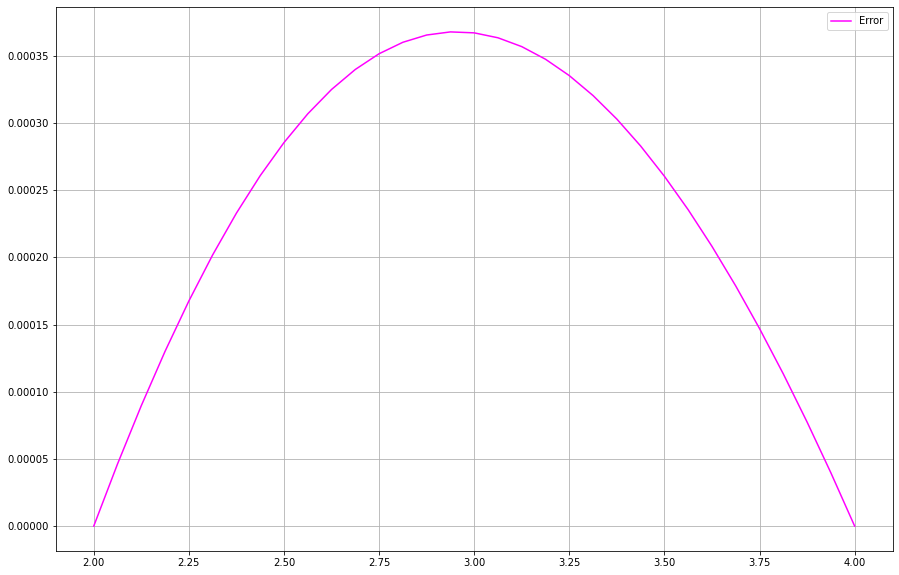

In [245]:
fix, axs = plt.subplots(1, 1, figsize = (15, 10))
axs.plot (x, np.abs(u(x)-uMy), color = 'fuchsia', label = 'Error')
axs.grid()
axs.legend()

Вмдно, что погрешность не превышает данного нам значения, что говорит о правильности решения задачи

##### Задача 8.2
Стержень составляется из трех частей одинаковой длины 1 и с разными  коэффициентами теплопроводности. Концы стержня поддерживаются при постоянной температуре. В каком порядке следует составить части стержня, чтобы  указанная точка x0 стержня имела максимальную температуру? 
Математически задача формулируется следующим образом: найти приближенное решение краевой задачи
$$ 
\begin {cases} -(k(x)u')'+q(x)u=f(x), x \in (a, b) \\ u(a) = u_a \\ u(b) = u_b \end{cases}
,где \begin {cases} k_1(x), 0\le x\le 1 \\ k_2(x), 1<x\le 2 \\ k_3(x), 2< x\le 3\end{cases}$$
$$ x_0=2.2 $$
$$ q = 0 $$
$$ f(x) = x^2 - 2x + 3 $$
$$ k_1(x)=6-x $$
$$ k_2(x)= \sqrt{x+3}$$
$$ k_3(x)= 16$$
$$ u_a = 5$$
$$ u_b = 1$$

In [246]:
#границы по x
a, b = 0, 3

#шаг
h = 0.5

#точка для поиска макс температуры
x0 = 2.2

#погрешность
eps = 10**(-3)

In [247]:
#функция k
def k1(x):
    return 6-x

def k2(x):
    return np.sqrt(x+3)

def k3(x):
    return 16

def k(x, num):
    res = 0
    if (num == 1):
        if (x>=0 and x<=1):
            res = k1(x)
        if (x>1 and x<=2):
            res = k2(x)
        if (x>2 and x<=3):
            res = k3(x)
    if (num == 2):
        if (x>1 and x<=2):
            res = k1(x)
        if (x>=0 and x<=1):
            res = k2(x)
        if (x>2 and x<=3):
            res = k3(x)
    if (num == 3):
        if (x>1 and x<=2):
            res = k1(x)
        if (x>2 and x<=3):
            res = k2(x)
        if (x>=0 and x<=1):
            res = k3(x)
    if (num == 4):
        if (x>=0 and x<=1):
            res = k1(x)
        if (x>2 and x<=3):
            res = k2(x)
        if (x>1 and x<=2):
            res = k3(x)
    if (num == 5):
        if (x>2 and x<=3):
            res = k1(x)
        if (x>=0 and x<=1):
            res = k2(x)
        if (x>1 and x<=2):
            res = k3(x)
    if (num == 6):
        if (x>2 and x<=3):
            res = k1(x)
        if (x>1 and x<=2):
            res = k2(x)
        if (x>=0 and x<=1):
            res = k3(x)
    return res

In [248]:
#вектор из функций в правой части
def vectorF(h):
    x = np.linspace(a, b, int((b-a)/h) + 1)
    vect = np.zeros([len(x)])
    vect[0], vect[len(x)-1] = 5, 1
    for i in range (1, len(vect)-1):
        vect[i]= (h**2)*f(a+h*i)
    return vect

In [249]:
#решение
def solveU(h, num):
    x = np.linspace(a, b, int((b-a)/h) + 1)
    mtr = np.zeros([len(x), len(x)])
    mtr[0][0] = 1
    mtr[len(x) - 1][len(x) - 1] = 1
    j = 0
    for i in range (1, len(mtr)-1):    
        mtr[i][j] = -k(a+h*i-h/2, num)
        mtr[i][j+1] = k(a+h*i+h/2, num) + k(a+h*i-h/2, num)
        mtr[i][j+2] = -k(a+h*i+h/2, num)
        j+=1    
    return solveMtrEq(mtr, vectorF(h))

In [250]:
#выбор макс разности между функций с шагами h и h/2
def maxR(u2h, uh):
    r = np.abs(u2h[1] - uh[2])
    for i in range(2, len(u2h)):
        if (np.abs(u2h[i] - uh[2*i])) >= r:
            r = np.abs(u2h[i] - uh[2*i])
    return r

In [251]:
#решение с точностью eps
def solveUEps(h, eps, num):
    u2h, uh = solveU(h, num), solveU(h/2, num)
    epsH = maxR(u2h, uh)
    while np.abs((epsH)/3) >= eps:
        h /= 2
        u2h = solveU(h, num)
        uh = solveU(h/2, num)
        epsH = maxR(u2h, uh)
    h  /= 2
    return uh

Задам массивы для вывода графиков решений для каждой конфигурации

In [252]:
u = [solveUEps(h, eps, 1), solveUEps(h, eps, 2), solveUEps(h, eps, 3), solveUEps(h, eps, 4), solveUEps(h, eps, 5), 
     solveUEps(h, eps, 6)]

x = [np.linspace(a, b, len(u[0])), np.linspace(a, b, len(u[1])), np.linspace(a, b, len(u[2])), np.linspace(a, b, len(u[3])), 
     np.linspace(a, b, len(u[4])), np.linspace(a, b, len(u[5]))]

clr = ['fuchsia', 'navy', 'darkviolet', 'darkcyan', 'crimson', 'limegreen']
lbl = ['u1', 'u2', 'u3', 'u4', 'u5', 'u6']

Выведем графики для каждой конфигурации

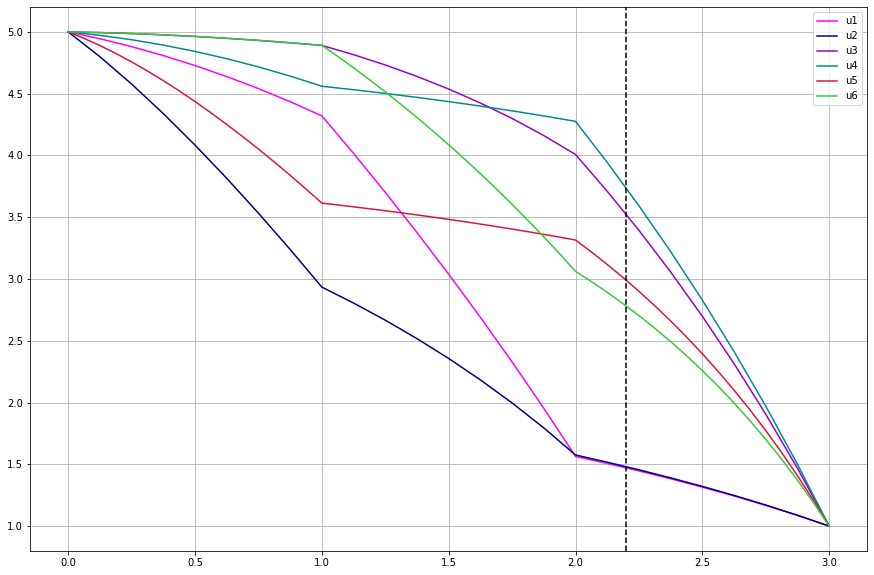

In [253]:
fix,axs = plt.subplots(1,1,figsize = (15, 10))
for i in range (0, len(u)):
    axs.plot (x[i], u[i], color = clr[i], label = lbl[i])
plt.axvline(x0, color = 'black', linestyle='dashed')
axs.grid()
axs.legend()

Из графика видно, что наибольшему значению температуры соответсвует четвёртая конфигурация стержня, которая получается если в функцию k(x) передавать параметр num = 4

Попробую найти это значение

In [254]:
#решение с точностью eps
def solveUEps(h, eps, num):
    u2h, uh = solveU(h, num), solveU(h/2, num)
    epsH = maxR(u2h, uh)
    while np.abs((epsH)/(2**2-1)) >= eps:
        h /= 2
        u2h = solveU(h, num)
        uh = solveU(h/2, num)
        epsH = maxR(u2h, uh)
    h  /= 2
    return uh, h

In [255]:
u4, h4 = solveUEps(h, eps, 4)
print('Максимальное значение температуры в точке x =', x0, 'равно', u4[round(x0/h4)])

Максимальное значение температуры в точке x = 2.2 равно 3.5927392657019706
